## Introduction
### Background
One of the more **iconic** video streaming websites of the modern internet is [Twitch](https://www.twitch.tv/). 
What originally started as a streaming website for just video games, it has branched out to several different types of media including streaming television shows and people eating food.
![Screenshot of Apex Legends](twitchgame.png)
![Screenshot of People Eating](mukbang.jpeg)
![Screenshot of Twitch Presents Pokemon](twitchpokemon.jpg)

As seen from the screenshots above, Twitch has this feature that allows users to write in a group chat box for everyone to see while enjoying the stream. This group of people is typically known as **Twitch Chat**.
Twitch Chat is often chaotic, full of memes, and not censored unless if the streamer themselves enforce a form of censorship.

*Note: Some bad words or phrases may appear in this notebook. It should be up to viewer discretion as to whether to continue from this point.*

### Purpose
We are going to try to make some sense of the **chaos** that goes in Twitch Chat by looking at 3 different types of streams. 

1. League of Legends Official Worlds Finals Stream
2. Doublelift's Stream (He's a professional player for League of Legends)
3. Twitch Presents Pokemon

The questions we are going to be looking at are:

1. Exactly what are the differences we can see between different types of streams?
2. Are there different levels of sentiment between different types of streams? What are they?
3. Is there some order that we can analyze and work with?

### Data Acquisition
I used [Twitch Chat Downloader](https://github.com/PetterKraabol/Twitch-Chat-Downloader) to get the data in a nice irc format which allowed me to parse it cleanly. The parsing code is in this notebook

### Results
While some results were expected, some were not completetly expected.

The expectations:

1. The League of Legends Official World's Finals Stream is going to have a lot of memes about Hong Kong in it because of the [incident with Blizzard Entertainment](https://www.cnet.com/news/blizzard-hearthstone-and-the-hong-kong-protests-heres-what-you-need-to-know/) and [Riot Games' very well known affliation with Tencent](https://www.polygon.com/2015/12/16/10326320/riot-games-now-owned-entirely-by-tencent).
2. The Pokemon Stream should be more positive than the video game streams.
3. There should not be too much specific terminology overlap between the video game streams and Pokemon.

The results:
1. Looking at the world cloud, Free Hong Kong was pretty significant. 
2. The Pokemon Stream scored lower in the sentiment analysis and recieved an overall neutral score.
3. There was more overlap than expected

## Libraries and Import Statements

In [73]:
pip install wordcloud
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [75]:
import io
import re
import string
import math
import nltk
import collections
import random
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import chart_studio.plotly as py
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from numpy import mean

## Data Processing

We get individual words, lines, and counts for each of these words.

*Note: I don't remove punctuation because of emojis.*

In [76]:
finalswords = []
finalslines = []
with io.open("riotgamesfinal.log", "r", encoding="utf-8") as f :
    lines = f.read().split('\n')
    for line in lines:
        l = line.split(' ')[2:]
        finalslines.append(' '.join(l))
        for word in l:
            finalswords.append(word)
    finalscount = collections.Counter(w.lower() for w in finalswords)

In [77]:
dliftwords = []
dliftlines = []
with io.open("dlift1.log", "r", encoding="utf-8") as f :
    lines = f.read().split('\n')
    for line in lines:
        l = line.split(' ')[2:]
        dliftlines.append(' '.join(l))
        for word in l:
            dliftwords.append(word)
with io.open("dlift2.log", "r", encoding="utf-8") as f :
    lines = f.read().split('\n')
    for line in lines:
        l = line.split(' ')[2:]
        dliftlines.append(' '.join(l))
        for word in l:
            dliftwords.append(word)
with io.open("dlift3.log", "r", encoding="utf-8") as f :
    lines = f.read().split('\n')
    for line in lines:
        l = line.split(' ')[2:]
        dliftlines.append(' '.join(l))
        for word in l:
            dliftwords.append(word)
with io.open("dlift4.log", "r", encoding="utf-8") as f :
    lines = f.read().split('\n')
    for line in lines:
        l = line.split(' ')[2:]
        dliftlines.append(' '.join(l))
        for word in l:
            dliftwords.append(word)
with io.open("dlift5.log", "r", encoding="utf-8") as f :
    lines = f.read().split('\n')
    for line in lines:
        l = line.split(' ')[2:]
        dliftlines.append(' '.join(l))
        for word in l:
            dliftwords.append(word)
with io.open("dlift6.log", "r", encoding="utf-8") as f :
    lines = f.read().split('\n')
    for line in lines:
        l = line.split(' ')[2:]
        dliftlines.append(' '.join(l))
        for word in l:
            dliftwords.append(word)
with io.open("dlift7.log", "r", encoding="utf-8") as f :
    lines = f.read().split('\n')
    for line in lines:
        l = line.split(' ')[2:]
        dliftlines.append(' '.join(l))
        for word in l:
            dliftwords.append(word)
with io.open("dlift8.log", "r", encoding="utf-8") as f :
    lines = f.read().split('\n')
    for line in lines:
        l = line.split(' ')[2:]
        dliftlines.append(' '.join(l))
        for word in l:
            dliftwords.append(word)
with io.open("dlift9.log", "r", encoding="utf-8") as f :
    lines = f.read().split('\n')
    for line in lines:
        l = line.split(' ')[2:]
        dliftlines.append(' '.join(l))
        for word in l:
            dliftwords.append(word)
with io.open("dlift10.log", "r", encoding="utf-8") as f :
    lines = f.read().split('\n')
    for line in lines:
        l = line.split(' ')[2:]
        dliftlines.append(' '.join(l))
        for word in l:
            dliftwords.append(word)           
dliftcount = collections.Counter(w.lower() for w in dliftwords)

In [78]:
pokewords = []
pokelines = []
with io.open("pokemon.log", "r", encoding="utf-8") as f :
    lines = f.read().split('\n')
    for line in lines:
        l = line.split(' ')[2:]
        pokelines.append(' '.join(l))
        for word in l:
            pokewords.append(word)           
pokecount = collections.Counter(w.lower() for w in pokewords)

## Most Common Words

Here it seems like lul is the shared most common word.

To put some context as to why some words may be commmon.

The League of Legends Finals:

1. [Residentsleeper](https://knowyourmeme.com/photos/1248330-twitch-emotes): It was Broadcasted really early in the morning and was a one sided match, so residentsleeper may be a result of that. 
2. TSM : A chant that is memed about a lot among the western fans, and since Twitch is a western focused sight, most of the fans are western
3. EU: a region was represented in the finals.
4. Free : the match was so one sided
5. Hong Kong: the Free Hong Kong Meme

Doublelift's Stream:
1. Pog , short for [PogChamp](https://knowyourmeme.com/photos/989713-reaction-images): Doublelift is a good player.

Twitch Presents Pokemon Stream:
1. [PogChamp](https://knowyourmeme.com/photos/989713-reaction-images): Ash does a lot of cool stuff in the tv show.
2. [Kreygasm](https://knowyourmeme.com/memes/kreygasm): People really enjoy Pokemon
3. [MonkaS](https://knowyourmeme.com/memes/monkas): Ash makes some questionable decisions sometimes
4. Catch: Pokemon slogo
5. [Biblethump](https://knowyourmeme.com/memes/biblethump): There are heart moving moments in Pokemon

In [79]:
print(finalscount.most_common(20))

[('lul', 48094), ('eu', 30777), ('g2', 27694), ('na', 25999), ('lulw', 24428), ('brainslug', 23237), ('free', 17079), ('pog', 16169), ('is', 14900), ('so', 14897), ('go', 13352), ('why', 12875), ('tsm', 12206), ('the', 12057), ('this', 10968), ('to', 10957), ('hong', 10774), ('kong', 10240), ('peped', 9701), ('residentsleeper', 9210)]


In [80]:
print(dliftcount.most_common(20))

[('is', 8718), ('lul', 8102), ('pog', 7850), ('the', 7476), ('lulw', 7432), ('kekw', 7353), ('you', 6221), ('i', 5923), ('to', 4857), ('a', 4693), ('in', 4454), ('@doublelift', 4234), ('and', 3548), ('for', 3426), ('that', 2813), ('no', 2659), ('he', 2598), ('on', 2563), ('it', 2555), ('this', 2406)]


In [81]:
print(pokecount.most_common(20))

[('lul', 13265), ('sourpls', 10590), ('pogchamp', 10005), ('biblethump', 6313), ('is', 5807), ('the', 5231), ('to', 4925), ('kreygasm', 4801), ('i', 4622), ('my', 4238), ('them', 3678), ('monkas', 3652), ('d:', 3411), ('no', 2729), ('was', 2599), ('ᴛᴏ', 2533), ('like', 2191), ('a', 2181), ('catch', 2103), ('be', 2089)]


## More Data Processing

This was primarily so that we can get Vader Sentiment to work later. I printed out the first 500 characters of each text so we can get some feeling with what we are working with.

In [82]:
finalstext = ','.join(finalslines).replace(',', '. ')
dlifttext = ','.join(dliftlines).replace(',', '. ')
fakertext = ','.join(fakerlines).replace(',', '. ')
poketext = ','.join(pokelines).replace(',', '. ')

In [83]:
print(finalstext[0:500])

G0-3 LUL. G2 0-3. g2 got smashed lul. EU fuming. ￼￼￼￼. wtf. why u guys spoiled it. SeemsGood. LUL WHY SO QUIET EU LUL. u guys suck. Lol. hey. Pog. KEKW. u angry. when r finals. LUL LUL LUL LUL LUL. FPX LETS GOOO. NA WHY SO QUIET LUL NA WHY SO QUIET LUL NA WHY SO QUIET LUL NA WHY SO QUIET LUL NA WHY SO QUIET LUL NA WHY SO QUIET LUL. G2 wins...our hearts. VOD GANG. g2 unlucky. I wanted to see it as well and now. 0:3. when is finals?. ￼￼￼￼￼￼￼￼￼￼￼￼￼￼. lol ggez. G2 lost KEKW. TSM > G2. eu lmao. NA WH


In [84]:
print(dlifttext[1:500])

elo. !mouse. !commands. brttetas. Fat Cock. Schaeppi e igualzinho o Snorlax... veja -> https://ibb.co/GWty9qb. https://www.twitch.tv/mikimae. !wallpaper. !rank. !opgg. here.  take my energy. jikn. !rank. NOT BANNED PogChamp. saved. 40k viewers F. WTF EU STAFF. GL HF :) GL HF :). WHAT HAPPEMED. AHAHAHAHAHA. SAVEDD. what happen. HELL YAH MORE ADS. @Doublelift 4Weird too far. TF IS HAPPENING. SAVED Pog. alanzCadeira alanzCadeira alanzCadeira alanzCadeira. :00000. SAVED. Caps ddosing :). BANNED. Pe


In [85]:
print(poketext[1:500])

ebaited ?. PogChamp I WANNA BE THE VERY BEST PogChamp LIKE NO ONE EVER WAS PogChamp TO CATCH THEM IS MY REAL TEST PogChamp TO TRAIN THEM IS MY CAUSE PogChamp I WILL TRAVEL ACROSS THE LAND PogChamp SEARCHING FAR AND WIDE PogChamp TEACH POKEMON TO UNDERSTAND PogChamp THE POWER THAT'S INSIDE PogChamp POKEMON PogChamp. FeelsAmazingMan FeelsAmazingMan FeelsAmazingMan. PogChamp. starts in 15 min. :PogChamp:. PogChamp ?. I knew it.. PogChamp. rooPog. Jebaited 15 min. PogChamp. omg lol. Jebaited 15 min


## Word Clouds

A fun more visual way to look at the word frequencies. I also thought it was pretty funny to see the Free Hong Kong Meme really show how prevelant it is in comparison to other words.

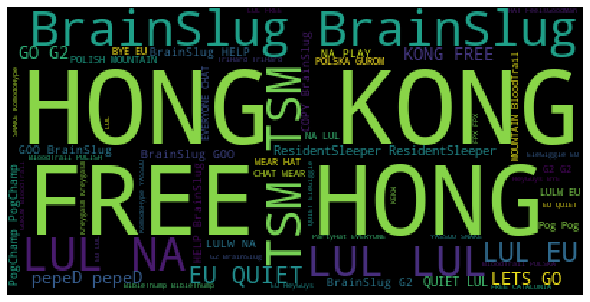

In [86]:
finalswc = WordCloud(stopwords=STOPWORDS).generate(finalstext)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(finalswc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

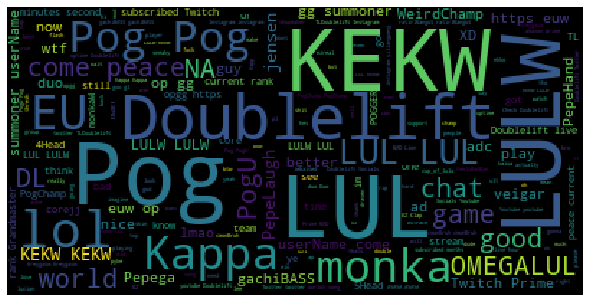

In [87]:
dliftwc = WordCloud(stopwords=STOPWORDS).generate(dlifttext)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(dliftwc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

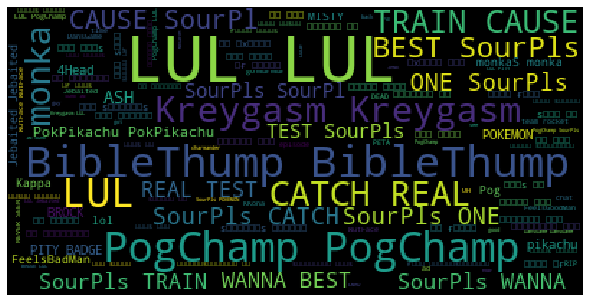

In [88]:
pokewc = WordCloud(stopwords=STOPWORDS).generate(poketext)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(pokewc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## Looking at Word Overlaps

Here we adjusted the overlap function from class to strictly show if the words do overlap, and how much overlap there was at least.

In [89]:
def overlap(c1, c2):
    return collections.Counter({w: min(c1[w], c2[w])
                                for w in c1
                                if w in c2})

In [90]:
overlap(finalscount, dliftcount).most_common(20)

[('is', 8718),
 ('lul', 8102),
 ('pog', 7850),
 ('the', 7476),
 ('lulw', 7432),
 ('to', 4857),
 ('a', 4693),
 ('i', 4528),
 ('in', 4454),
 ('for', 3426),
 ('kekw', 3009),
 ('you', 2893),
 ('and', 2727),
 ('no', 2659),
 ('it', 2555),
 ('this', 2406),
 ('of', 2387),
 ('pogu', 2373),
 ('so', 2252),
 ('are', 2187)]

In [91]:
overlap(finalscount, pokecount).most_common(20)

[('lul', 13265),
 ('pogchamp', 8194),
 ('is', 5807),
 ('the', 5231),
 ('to', 4925),
 ('biblethump', 4758),
 ('i', 4528),
 ('kreygasm', 3546),
 ('no', 2729),
 ('a', 2181),
 ('was', 1868),
 ('it', 1727),
 ('my', 1623),
 ('you', 1357),
 ('residentsleeper', 1297),
 ('in', 1262),
 ('best', 1219),
 ('4head', 1187),
 ('this', 1174),
 ('f', 1167)]

In [92]:
overlap(dliftcount, pokecount).most_common(20)

[('lul', 8102),
 ('is', 5807),
 ('the', 5231),
 ('to', 4857),
 ('i', 4622),
 ('no', 2659),
 ('a', 2181),
 ('monkas', 1728),
 ('it', 1727),
 ('d:', 1687),
 ('my', 1372),
 ('you', 1357),
 ('was', 1342),
 ('in', 1262),
 ('like', 1241),
 ('pogchamp', 1201),
 ('this', 1174),
 ('f', 1141),
 ('kreygasm', 1130),
 ('be', 1122)]

## Relevant Functions for the LL Scores + Graphs

In [93]:
def compute_ll(a, b, c, d) :
    rate = (a+b) / (c+d)
    e1 = c * rate
    e2 = d * rate
    ll = 2 * (a * math.log(a/e1) + b * math.log(b/e2))
    return ll

In [94]:
def ll_diff_score(ct1, ct2, words) :
    c = sum(ct1.values())
    d = sum(ct2.values())
    results = {w: compute_ll(ct1[w], ct2[w], c - ct1[w], d - ct2[w]) 
              for w in words}
    return results

In [95]:
def total_overlap(c1, c2):
    return collections.Counter({w:c1[w]+c2[w]
                                for w in c1
                                if w in c2})

In [96]:
def subselect(ct, items, max_pts=1000) :
    # input data
    sct = collections.Counter()
    step = math.log(len(items)) / max_pts
    pts = 0
    index = 0
    while pts < max_pts and index < len(items):
        # if we're far enough from the last point
        if math.log(index + 1) >= step * pts:
                # include this item and look for the next point
                w = items[index]
                sct[w] = ct[w]
                pts = pts + 1
        index = index + 1
    return sct

In [97]:
fdlift = total_overlap(finalscount, dliftcount)
fdlift_sig = ll_diff_score(finalscount, dliftcount, fdlift)
sfdlift = subselect(fdlift, [w for (v,w) in sorted([(v,w) for w,v in fdlift_sig.items()], reverse=True)])
sfdlift_sig = ll_diff_score(finalscount, dliftcount, sfdlift)

In [98]:
sorted([(v,w) for w,v in fdlift_sig.items()], reverse=True)[:20]

[(17642.650213844492, 'g2'),
 (16432.121357435582, 'brainslug'),
 (11376.159473887963, 'eu'),
 (10199.120843051058, '@doublelift'),
 (9356.812156793145, 'free'),
 (9332.176343023486, 'na'),
 (7611.708814182974, 'kekw'),
 (7590.3463368881185, 'lul'),
 (7498.665570355189, 'hong'),
 (7118.618771216735, 'kong'),
 (6681.654403933411, 'tsm'),
 (5839.581097180468, 'you'),
 (4776.3748974063465, 'go'),
 (4757.226504981295, 'peped'),
 (4434.707430988175, 'bloodtrail'),
 (4344.265426243038, 'lets'),
 (4302.782465074323, 'fpx'),
 (4059.9199459628826, 'residentsleeper'),
 (4023.3132148218556, 'quiet'),
 (3960.1700857746036, 'forsene')]

In [99]:
fpoke = total_overlap(finalscount, pokecount)
fpoke_sig = ll_diff_score(finalscount, pokecount, fpoke)
sfpoke = subselect(fpoke, [w for (v,w) in sorted([(v,w) for w,v in fpoke_sig.items()], reverse=True)])
sfpoke_sig = ll_diff_score(finalscount, pokecount, fpoke)

In [100]:
sorted([(v,w) for w,v in fpoke_sig.items()], reverse=True)[:20]

[(31944.260173138384, 'sourpls'),
 (13618.986620573785, 'eu'),
 (13080.569235414185, 'g2'),
 (11454.729998416167, 'na'),
 (10999.364210786438, 'brainslug'),
 (10513.213365490808, 'pogchamp'),
 (9663.937053930505, 'them'),
 (9643.29684319126, 'lulw'),
 (7226.138187131614, 'my'),
 (7078.634273170192, 'free'),
 (7049.756242676791, 'biblethump'),
 (6816.124601503253, 'monkas'),
 (6584.399013042694, 'catch'),
 (6303.13690560979, 'd:'),
 (5723.027155109823, 'tsm'),
 (5427.72401295105, 'kreygasm'),
 (5144.284367963499, 'train'),
 (5136.717279238677, 'very'),
 (5051.230250908683, 'wanna'),
 (4933.375899874353, 'hong')]

In [101]:
pokedlift = total_overlap(pokecount, dliftcount)
pokedlift_sig = ll_diff_score(pokecount, dliftcount, pokedlift)
spokedlift = subselect(pokedlift, [w for (v,w) in sorted([(v,w) for w,v in pokedlift_sig.items()], reverse=True)])
spokedlift_sig = ll_diff_score(pokecount, dliftcount, pokedlift)

In [102]:
sorted([(v,w) for w,v in pokedlift_sig.items()], reverse=True)[:20]

[(20395.108617865397, 'sourpls'),
 (13030.498361734642, 'pogchamp'),
 (9694.954086534919, 'biblethump'),
 (6018.869361552612, 'kekw'),
 (5605.776926831803, 'lulw'),
 (5353.454824253709, 'them'),
 (5162.242191950142, 'lul'),
 (4859.663147542882, 'ᴛᴏ'),
 (4578.525792104183, 'kreygasm'),
 (3994.8498539671373, 'pog'),
 (3927.625055134411, 'catch'),
 (3248.794644287159, 'my'),
 (3214.6616329182357, 'pokpikachu'),
 (3192.339114946839, 'train'),
 (2862.186955502714, 'pokemon'),
 (2819.0846486877913, 'test'),
 (2770.2405815810043, 'wanna'),
 (2608.6812208621345, 'very'),
 (2603.0630351901577, 'real'),
 (2593.332865008674, 'cause')]

In [103]:
def showdiff(a,b) :
    if a == 0 or b == 0 :
        return float('inf')
    elif a > b :
        return a/b
    else:
        return b/a

def llcontrastscatter(r1, r2, llvs) :
    t1 = float(sum(r1.values()))
    t2 = float(sum(r2.values()))
    x = [r1[w]/t1 for w in llvs]
    y = [r2[w]/t2 for w in llvs]
    text = [u"{}: {:.7f}, {:.7f}".format(w, llvs[w], 
                                         showdiff(r1[w]/t1, r2[w]/t2)) 
            for w in llvs]
    color = [math.pow(llvs[w], 1/5) for w in llvs]
    return dict(x=x, y=y, text=text, 
                marker=dict(size=10, 
                            color=color, 
                            colorscale='Blackbody'), 
                mode='markers', hoverinfo='text')

In [104]:
plotly.offline.iplot(dict(data=[go.Scatter(llcontrastscatter(finalscount, dliftcount, sfdlift_sig))],
                          layout=dict(title=u'League of Legends Finals vs Doublelift Stream',
                                      hovermode='closest',
                                      shapes=[dict(type='line',x0=1e-5,y0=1e-5,x1=5e-2,y1=5e-2),
                                             dict(type='line',x0=2e-5,y0=1e-5,x1=5e-2,y1=2.5e-2,line=dict(dash='dot')),
                                             dict(type='line',x0=1e-5,y0=2e-5,x1=5e-2,y1=1e-1,line=dict(dash='dot'))],
                                      xaxis=dict(type='log', title=u'League of Legends Finals'),
                                      yaxis=dict(type='log', title=u'Doublelift'))))

### Not that Surprising

1. Pog : Common in both - People make pretty exciting players
2. @doublelift : More in Doublelift's - It's a way to ping the streamer
3. Hong Kong : More in the Official - Riot's affliation with Tencent

### Surprising
1. Naruto : Common in both - Why is anime talked about in a video game stream?
2. 33 : More in Doublelift's - It's a random number
3. :snake: : More in the Official - It's a random emoji

In [105]:
plotly.offline.iplot(dict(data=[go.Scatter(llcontrastscatter(finalscount, pokecount, sfpoke_sig))],
                          layout=dict(title=u'League of Legends Finals vs Pokemon Stream',
                                      hovermode='closest',
                                      shapes=[dict(type='line',x0=1e-5,y0=1e-5,x1=5e-2,y1=5e-2),
                                             dict(type='line',x0=2e-5,y0=1e-5,x1=5e-2,y1=2.5e-2,line=dict(dash='dot')),
                                             dict(type='line',x0=1e-5,y0=2e-5,x1=5e-2,y1=1e-1,line=dict(dash='dot'))],
                                      xaxis=dict(type='log', title=u'League of Legends Finals'),
                                      yaxis=dict(type='log', title=u'Pokemon'))))

### Not that Surprising

1. Pog : Common in both - Pokemon is exciting and video games are exciting
2. test : More in Pokemon - Pokemon's Lyrics.
3. sweep : More in the Official - It was a one sided match

### Surprising
1. traitor : Common in both - Not sure why traitor would come up at all
2. alpha : More in Pokemon - Pokemon doesn't seem to be the sterotypical "alpha" thing to do
3. rice : More in the Official - Not sure why rice would come up at all

In [106]:
plotly.offline.iplot(dict(data=[go.Scatter(llcontrastscatter(pokecount, dliftcount, spokedlift_sig))],
                          layout=dict(title=u'Pokemon Stream vs Doublelift Stream',
                                      hovermode='closest',
                                      shapes=[dict(type='line',x0=1e-5,y0=1e-5,x1=5e-2,y1=5e-2),
                                             dict(type='line',x0=2e-5,y0=1e-5,x1=5e-2,y1=2.5e-2,line=dict(dash='dot')),
                                             dict(type='line',x0=1e-5,y0=2e-5,x1=5e-2,y1=1e-1,line=dict(dash='dot'))],
                                      xaxis=dict(type='log', title=u'Pokemon'),
                                      yaxis=dict(type='log', title=u'Doublelift'))))

### Not that Surprising

1. Pog : Common in both - Pokemon is exciting and video games are exciting
2. dl : More in Doublelift's - It's the shortened version of the streamer's gamer tag
3. james : More in Pokemon - A character in Pokemon

### Surprising
1. rice : Common in both - Not sure why rice would come up at all
2. luck : More in Doublelift's - Ash is pretty lucky sometimes
3. boomer : More in Pokemon - Pretty sure people of all ages enjoy Pokemon

## Sentiment Analysis

After failing pretty hard with the Stanford Core NLP Sentiment Analysis, I decided to switch over to [Vader Sentiment Analysis](https://github.com/cjhutto/vaderSentiment) and take the average compound score.

According to Vader's Github page:

Anything with a compound score over 0.05 is positive, in between -0.05 and 0.05 is neutral, negative is below -0.05

## Score for Finals : Positive

In [107]:
analyzer = SentimentIntensityAnalyzer()
finalsscores = []
for line in finalslines:
    vs = analyzer.polarity_scores(line)
    finalsscores.append(vs.get('compound'))
finalsavg = mean(finalsscores)
print(finalsavg)

0.05032602746068626


## Score for Doublelift: Neutral

In [108]:
analyzer = SentimentIntensityAnalyzer()
dliftscores = []
for line in dliftlines:
    vs = analyzer.polarity_scores(line)
    dliftscores.append(vs.get('compound'))
dliftavg = mean(dliftscores)
print(dliftavg)

0.040013372572868244


## Score for Pokemon: Neutral

In [109]:
analyzer = SentimentIntensityAnalyzer()
pokescores = []
for line in pokelines:
    vs = analyzer.polarity_scores(line)
    pokescores.append(vs.get('compound'))
pokeavg = mean(pokescores)
print(pokeavg)

0.021983637784820972


## Final Thoughts

Even though Twitch Chat seems chaotic, there are some patterns to the chaos and reasons you can decipher if well versed in the current memes.

I encourage you to try to make your own analysis using twitch chat. It was quite fun to see what results came out of this experiment
